## Intro to Business Analytics Assignment 1

### Contributors
- Stanisław Howard
- Alexis Van den Heede, s231860
- Matthias Van Mechelen


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Trips_2018.csv')

In [3]:
df_copy = df.copy()
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
# rerun this to save time if you make a typo and need original df again
df = df_copy.copy()

In [5]:
# col 0 is unnamed, change name to trip_id convert column to index
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [6]:
#  convert start time and stop time to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
# make user type dummy, get shape
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
print(df.shape)
df.head()


(17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1


In [8]:
# plotting coordinates
def plot_map(coords):
    plt.scatter(coords[:,0], coords[:,1], s=0.75)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [9]:
# get lat and long
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)



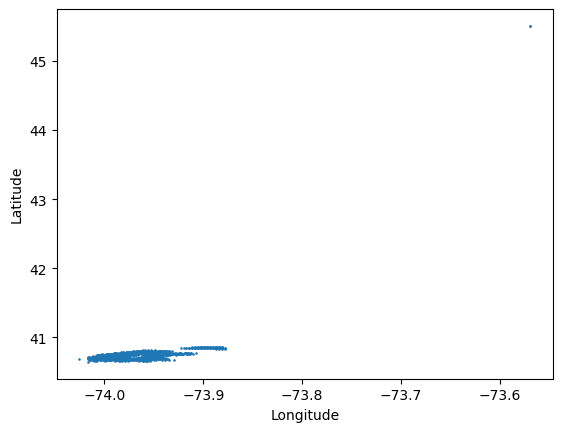

In [10]:
plot_map(coords)


Notice outlier (Canada, Montreal). quickly get rid of it to get an overview of the rest of the data. We will not yet delete the outlier datapoint from the dataframe.

In [11]:
# get rid of outlier longitude > -73.6
coords = coords[coords[:,0] < -73.6]
print(coords.shape) #shape is 917 here as it still includes the grid anomalies

(917, 2)


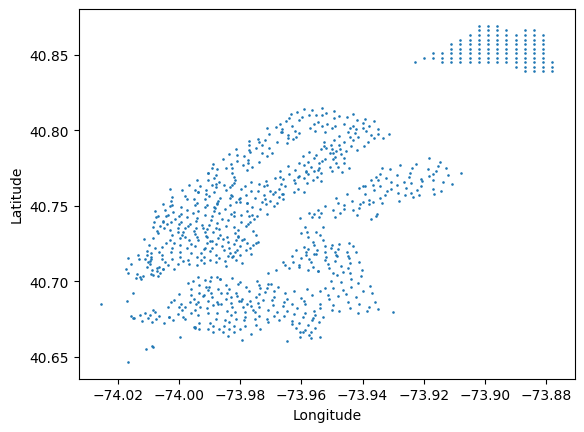

In [12]:
plot_map(coords)
# shows the unique start and end stations present in the dataset.

Notice very structured grid in top right corner. After investigation these data points were NaN's. We will rid of these data points, and at the same time we get rid of the canada outlier. 

In [13]:
# print where nan is in df, get rid of nan (= get rid of gridded outliers), create copy of df and start station coordinates
print(df.isnull().sum())
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
# get rid of Canada outlier
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
# get lat and long
coords_start = df[['start_station_longitude','start_station_latitude']].values
coords_start = np.unique(coords_start, axis=0)
coords_start_copy = coords_start.copy()
print(coords.shape)

tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
birth_year                    0
gender                        0
usertype_Subscriber           0
dtype: int64
(917, 2)


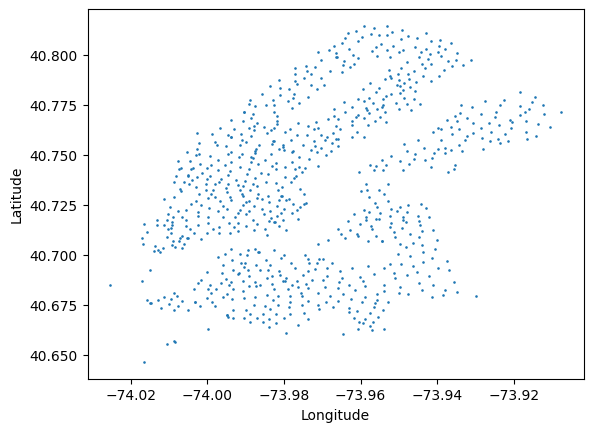

In [14]:
plot_map(coords_start)

In [15]:
# amount of distinct end stations does not match amount of start stations as seen from comparing shapes, create copy of end station coordinates.
coords_end = df[['end_station_longitude','end_station_latitude']].values
coords_end = np.unique(coords_end, axis=0)
print(coords_end.shape)
print(coords_start.shape)
coords_end_copy = coords_end.copy()


(849, 2)
(817, 2)


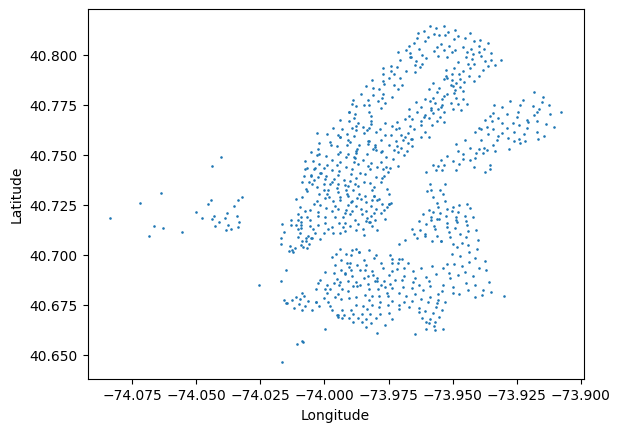

In [16]:
#what does the difference look like visually?
plot_map(coords_end)

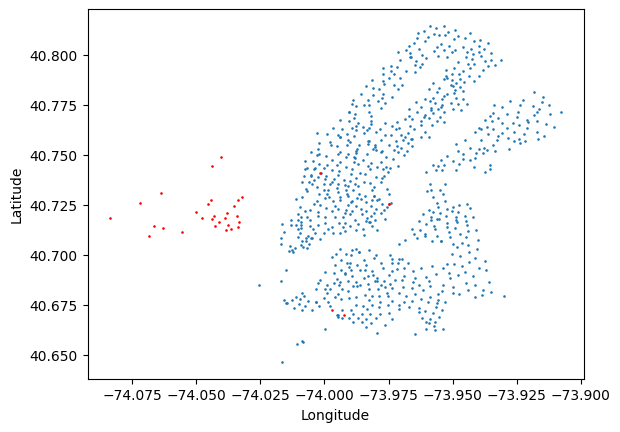

In [17]:
# highlight the end stations that are not in the start stations on the map of all en
coords_end_not_in_start = []
for i in range(len(coords_end)):
    if coords_end[i] not in coords_start:
        coords_end_not_in_start.append(coords_end[i])
coords_end_not_in_start = np.array(coords_end_not_in_start)
plt.scatter(coords_start[:,0], coords_start[:,1], s=0.75)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(coords_end_not_in_start[:,0], coords_end_not_in_start[:,1], s=0.75, c='r')
plt.show()


Since there are more end stations than start stations and all start stations are also an end station, the clustering should be done using the end stations in order to cluster every station considered in the data. 

Clustering the stations

In [18]:
# import kmeans
from sklearn.cluster import KMeans

In [19]:
n_clusters = 20

In [20]:
# make kmeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords_end) # using coords here instead of df to increase speed

C:\Users\alexi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Train on coords instead of DataFrame to increase speed, then predict to save labels on df, model is trained on same data as you predict the cluster for, so the cluster they belong to will be the same one as they belonged to during convergence of the Kmeans cluster.

In [21]:
df['drop_label'] = kmeans.predict(df[['end_station_longitude','end_station_latitude']].values)
df['pick_label'] = kmeans.predict(df[['start_station_longitude','start_station_latitude']].values)
df_copy2 = df.copy()


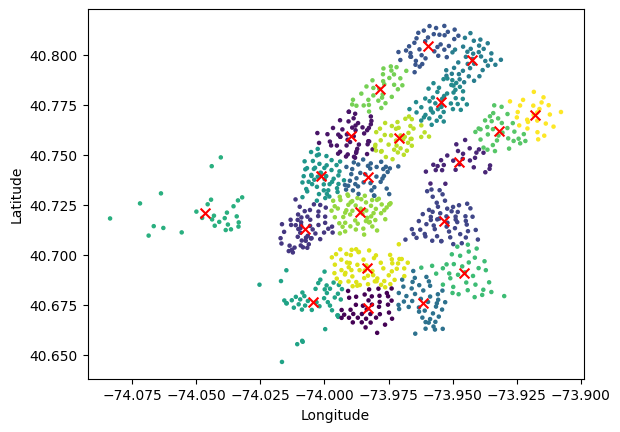

In [22]:
# plot with cluster colour & centriods
plt.scatter(coords_end[:,0], coords_end[:,1], c=kmeans.labels_, s=5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker="x", s=50)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [81]:
# run this cell for coords of starting stations and the fully edited dataframe
coords_start = coords_start_copy.copy()
coords_end = coords_end_copy.copy()
df = df_copy2.copy()
print(df.shape) # to check if no data loss, should be (17548339, 15)
df.head()


(17545760, 15)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber,drop_label,pick_label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1,15,1


**Now part 2**

We need to predict the following

In [82]:
# find n largest pick cluster, randomly chose pick label over drop label
n = 1
largest_cluster = df['pick_label'].value_counts().nlargest(n).index[:n]
print(largest_cluster)
# get all rows with largest cluster 
df = df[df['pick_label'].isin(largest_cluster)]


Index([10], dtype='int32', name='pick_label')


In [83]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber,drop_label,pick_label
trip_id,,,,,,,,,,,,,,,
4183,1176,2018-01-01 01:11:58.481,2018-01-01 01:31:34.729,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1979,2,1,6,10
4184,1824,2018-01-01 01:12:26.474,2018-01-01 01:42:50.474,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1969,1,1,1,10
4185,613,2018-01-01 09:55:37.097,2018-01-01 10:05:50.697,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1966,1,1,1,10
4186,463,2018-01-01 10:27:30.491,2018-01-01 10:35:13.638,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1992,1,1,16,10
4187,454,2018-01-01 10:27:52.262,2018-01-01 10:35:26.884,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1991,2,1,16,10


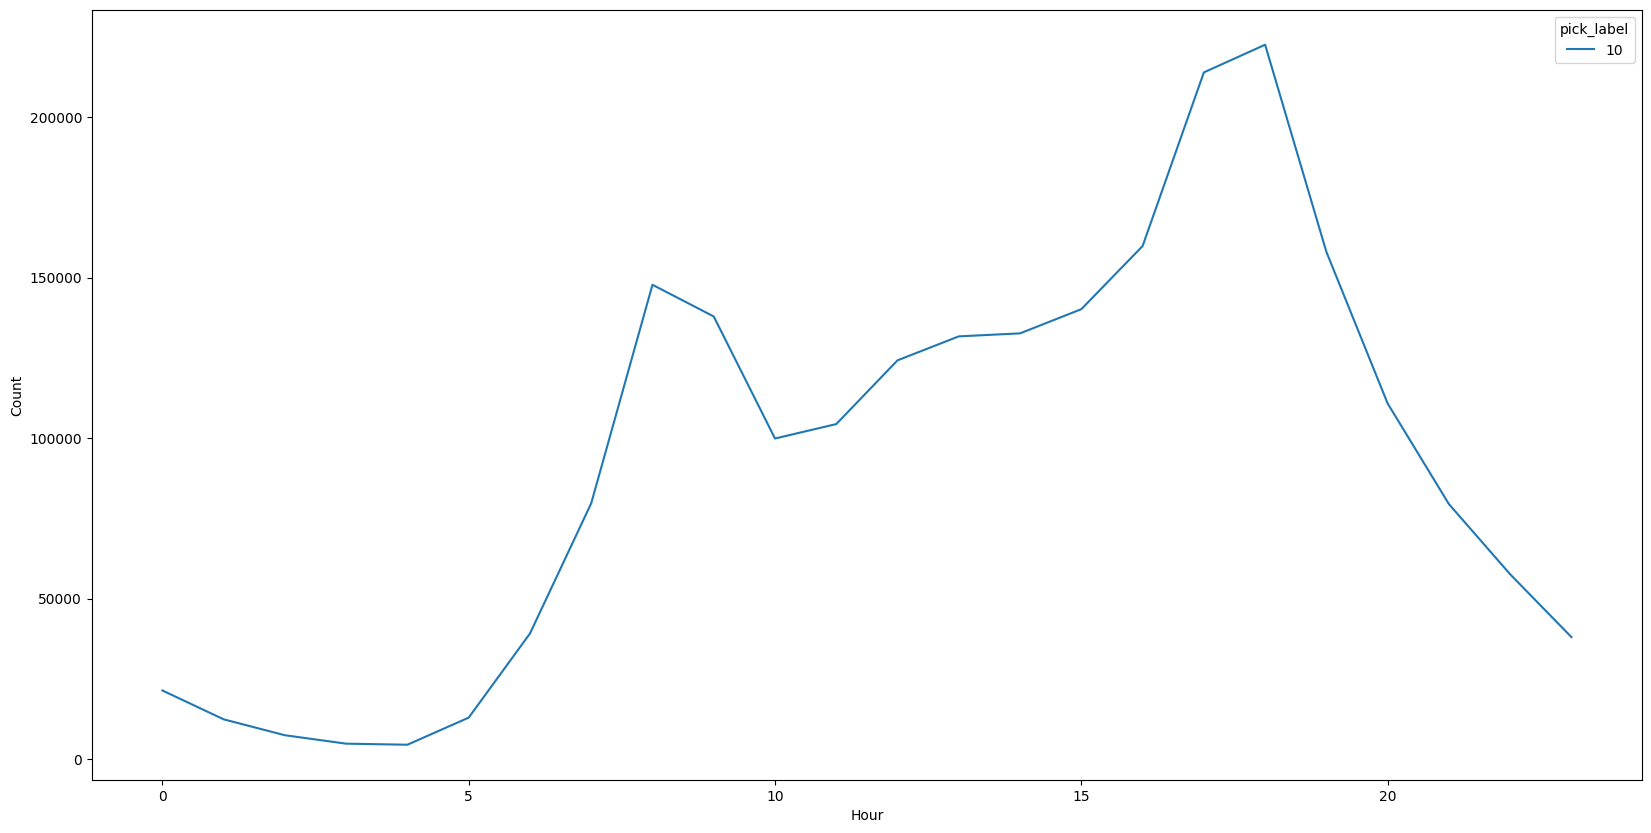

In [84]:
# 1st plot amount of predictions per hour per cluster
grouby_label = df.groupby(['pick_label', df['starttime'].dt.hour]).size().reset_index(name='count')
grouby_label = grouby_label.pivot(index='starttime', columns='pick_label', values='count')
grouby_label.plot(figsize=(20,10), legend=True)
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

Start by splitting up the dataset. Necessary because how are you going to aggregate the data by hour if each datapoint has 2 temporal parameters (start and end station times). Note that we can only use the hour and cluster as input to our model, as these are the only variables we have certain information on for the future datapoints for which we predict the demand, so we only have to copy these variables over in the new datasets. 

In [85]:
#splitting the dataset
df_departures = df[["starttime", "pick_label"]]
df_arrivals = df[["stoptime", "drop_label"]]

#replace the starttime datetime object by a column with hour and cols with date DD, MM. For df_departures and stoptime, DD, MM for df_arrivals
df_departures["start_hour"] = df_departures["starttime"].dt.hour
df_departures["start_day"] = df_departures["starttime"].dt.day
df_departures["start_month"] = df_departures["starttime"].dt.month
df_arrivals["stop_hour"] = df_arrivals["stoptime"].dt.hour
df_arrivals["stop_day"] = df_arrivals["stoptime"].dt.day
df_arrivals["stop_month"] = df_arrivals["stoptime"].dt.month
df_departures.drop(columns=["starttime"], inplace=True)
df_arrivals.drop(columns=["stoptime"], inplace=True)


#remove trip_id index. We will aggregate the data by hour, so this will lost its meaning. 
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

#Count the amount of dataframe rows that have the same label, hour, day and month. and add the count as extra column
df_departures = df_departures.groupby(["pick_label", "start_hour", "start_day", "start_month"]).size().reset_index(name="count")
df_arrivals = df_arrivals.groupby(["drop_label", "stop_hour", "stop_day", "stop_month"]).size().reset_index(name="count")



C:\Users\alexi\AppData\Local\Temp\ipykernel_40456\1523437805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_departures["start_hour"] = df_departures["starttime"].dt.hour
C:\Users\alexi\AppData\Local\Temp\ipykernel_40456\1523437805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_departures["start_day"] = df_departures["starttime"].dt.day
C:\Users\alexi\AppData\Local\Temp\ipykernel_40456\1523437805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

note: days close to eachother being linked in prediction is already included in the model as you have days and months in your model. And i dont think that it matters that i split up days and months (my guess what taht the model believes the first day of each month is closely related which it isnt. But the month is also included, nevertheless it is a fair thought. Maybe it is better to include the day and month as a counter instead, this will avoid the first day of each month being related! (as yes the months differentiate them, but the first of jun is still close in dist to the first of jan in my method, while with a continuous counter this would really not be the case. Change later

In [86]:
df_arrivals.head()

,drop_label,stop_hour,stop_day,stop_month,count
0,0,0,1,2,1
1,0,0,1,3,1
2,0,0,1,10,2
3,0,0,2,5,1
4,0,0,2,9,1


In [87]:
df_departures.head()

,pick_label,start_hour,start_day,start_month,count
0,10,0,1,1,15
1,10,0,1,2,30
2,10,0,1,3,51
3,10,0,1,4,46
4,10,0,1,5,28


Train two Random forest regressors. One to predict the amount of departures and one to predict the amount of arrivals. The data has to be split as required in the assignment: Training data contains data from januari - October. Test data contains data from November - December. Hence we will sort the data by month and exploit this sort to make the split. 

In [88]:
#sort the data by month in ascending order
df_departures.sort_values(by=["start_month"], inplace=True)
df_arrivals.sort_values(by=["stop_month"], inplace=True)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



#split the data into train and test data, training data from month 1-10, test data from month 11-12. 
X_train_dep = df_departures[df_departures["start_month"] < 11].drop(columns=["count"])
X_test_dep = df_departures[df_departures["start_month"] >= 11].drop(columns=["count"])
y_train_dep = df_departures[df_departures["start_month"] < 11]["count"]
y_test_dep = df_departures[df_departures["start_month"] >= 11]["count"]
X_train_arr = df_arrivals[df_arrivals["stop_month"] < 11].drop(columns=["count"])
X_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11].drop(columns=["count"])
y_train_arr = df_arrivals[df_arrivals["stop_month"] < 11]["count"]
y_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11]["count"]

#control check
print(X_train_dep["start_month"].unique())
print(X_train_arr["stop_month"].unique())
print(X_test_dep["start_month"].unique())
print(X_test_arr["stop_month"].unique())


[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[11 12]
[11 12]


In [90]:
#train the decision tree regressors
reg_dep = RandomForestRegressor(random_state=0)
reg_arr = RandomForestRegressor(random_state=0)
reg_dep.fit(X_train_dep, y_train_dep)
reg_arr.fit(X_train_arr, y_train_arr)

RandomForestRegressor(random_state=0)

Evaluate the models

In [91]:
#predict the amount of departures and arrivals
y_pred_dep = reg_dep.predict(X_test_dep)
y_pred_arr = reg_arr.predict(X_test_arr)

#calculate the r2 score
r2_dep = r2_score(y_test_dep, y_pred_dep)
r2_arr = r2_score(y_test_arr, y_pred_arr)
print("R2 departures: ", r2_dep)
print("R2 arrivals: ", r2_arr)

R2 departures:  -0.6162978766736444
R2 arrivals:  0.13511601567464082


In [92]:
# test if month  are influencing the prediction in a bad way
X_train_dep = df_departures[df_departures["start_month"] < 11].drop(columns=["count", "start_month"])
X_test_dep = df_departures[df_departures["start_month"] >= 11].drop(columns=["count", "start_month"])
y_train_dep = df_departures[df_departures["start_month"] < 11]["count"]
y_test_dep = df_departures[df_departures["start_month"] >= 11]["count"]
X_train_arr = df_arrivals[df_arrivals["stop_month"] < 11].drop(columns=["count", "stop_month"])
X_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11].drop(columns=["count", "stop_month"])
y_train_arr = df_arrivals[df_arrivals["stop_month"] < 11]["count"]
y_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11]["count"]

#train the decision tree regressors
reg_dep = RandomForestRegressor(random_state=0)
reg_arr = RandomForestRegressor(random_state=0)
reg_dep.fit(X_train_dep, y_train_dep)
reg_arr.fit(X_train_arr, y_train_arr)

#predict the amount of departures and arrivals
y_pred_dep = reg_dep.predict(X_test_dep)
y_pred_arr = reg_arr.predict(X_test_arr)

#calculate the r2 score
r2_dep = r2_score(y_test_dep, y_pred_dep)
r2_arr = r2_score(y_test_arr, y_pred_arr)
print("R2 departures: ", r2_dep)
print("R2 arrivals: ", r2_arr)

R2 departures:  0.19190735468876063
R2 arrivals:  0.5668463024301285


In [102]:
# grid serach for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#split the data into train and test data, training data from month 1-10, test data from month 11-12.
X_train_dep = df_departures[df_departures["start_month"] < 11].drop(columns=["count"])
X_test_dep = df_departures[df_departures["start_month"] >= 11].drop(columns=["count"])
y_train_dep = df_departures[df_departures["start_month"] < 11]["count"]
y_test_dep = df_departures[df_departures["start_month"] >= 11]["count"]
X_train_arr = df_arrivals[df_arrivals["stop_month"] < 11].drop(columns=["count"])
X_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11].drop(columns=["count"])
y_train_arr = df_arrivals[df_arrivals["stop_month"] < 11]["count"]
y_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11]["count"]

#control check
print(X_train_dep["start_month"].unique())
print(X_train_arr["stop_month"].unique())
print(X_test_dep["start_month"].unique())
print(X_test_arr["stop_month"].unique())

#make a scorer for the grid search
scorer = make_scorer(r2_score)

#make a parameter grid
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10, 20, 50]
}

#make a grid search for the departures
grid_dep = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=3, scoring=scorer)
grid_dep.fit(X_train_dep, y_train_dep)

#make a grid search for the arrivals
grid_arr = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=3, scoring=scorer)
grid_arr.fit(X_train_arr, y_train_arr)

#predict the amount of departures and arrivals
y_pred_dep = grid_dep.predict(X_test_dep)
y_pred_arr = grid_arr.predict(X_test_arr)

#calculate the r2 score
r2_dep = r2_score(y_test_dep, y_pred_dep)
r2_arr = r2_score(y_test_arr, y_pred_arr)
print("R2 departures: ", r2_dep)
print("R2 arrivals: ", r2_arr)




[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[11 12]
[11 12]


Month makes model worse prodbably due to split 

Bad R^2 so feature engineer

In [93]:
# add lag function
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [94]:
# add lag features
lag = 0
df_departures = buildLaggedFeatures(df_departures, ["count"], lag=lag)
df_arrivals = buildLaggedFeatures(df_arrivals, ["count"], lag=lag)

In [95]:
df_departures.head()

,pick_label,start_hour,start_day,start_month,count
0,10,0,1,1,15
6230,10,17,5,1,71
6242,10,17,6,1,45
6254,10,17,7,1,62
6266,10,17,8,1,196


In [96]:
df_arrivals.head()

,drop_label,stop_hour,stop_day,stop_month,count
55823,15,9,13,1,1
30029,6,10,3,1,29
67370,16,19,26,1,55
30041,6,10,4,1,3
30053,6,10,5,1,7


In [97]:
# re train forest
X_train_dep = df_departures[df_departures["start_month"] < 11].drop(columns=["count", "start_month"])
X_test_dep = df_departures[df_departures["start_month"] >= 11].drop(columns=["count", "start_month"])
y_train_dep = df_departures[df_departures["start_month"] < 11]["count"]
y_test_dep = df_departures[df_departures["start_month"] >= 11]["count"]
X_train_arr = df_arrivals[df_arrivals["stop_month"] < 11].drop(columns=["count", "stop_month"])
X_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11].drop(columns=["count", "stop_month"])
y_train_arr = df_arrivals[df_arrivals["stop_month"] < 11]["count"]
y_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11]["count"]


In [98]:
reg_dep = RandomForestRegressor(random_state=0)
reg_arr = RandomForestRegressor(random_state=0)


In [99]:
reg_dep.fit(X_train_dep, y_train_dep)
reg_arr.fit(X_train_arr, y_train_arr)

RandomForestRegressor(random_state=0)

In [100]:

y_pred_dep = reg_dep.predict(X_test_dep)
y_pred_arr = reg_arr.predict(X_test_arr)

r2_dep = r2_score(y_test_dep, y_pred_dep)
r2_arr = r2_score(y_test_arr, y_pred_arr)
print("R2 departures: ", r2_dep)
print("R2 arrivals: ", r2_arr)

R2 departures:  0.19190735468876063
R2 arrivals:  0.5668463024301285


In [101]:
# logistical regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# add square of each x
X_train_dep = df_departures[df_departures["start_month"] < 11].drop(columns=["count", "start_month"])
X_test_dep = df_departures[df_departures["start_month"] >= 11].drop(columns=["count", "start_month"])
y_train_dep = df_departures[df_departures["start_month"] < 11]["count"]
y_test_dep = df_departures[df_departures["start_month"] >= 11]["count"]
X_train_arr = df_arrivals[df_arrivals["stop_month"] < 11].drop(columns=["count", "stop_month"])
X_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11].drop(columns=["count", "stop_month"])
y_train_arr = df_arrivals[df_arrivals["stop_month"] < 11]["count"]
y_test_arr = df_arrivals[df_arrivals["stop_month"] >= 11]["count"]

X_train_dep["start_hour^2"] = X_train_dep["start_hour"]**2
X_train_dep["start_day^2"] = X_train_dep["start_day"]**2
X_test_dep["start_hour^2"] = X_test_dep["start_hour"]**2
X_test_dep["start_day^2"] = X_test_dep["start_day"]**2
X_train_arr["stop_hour^2"] = X_train_arr["stop_hour"]**2
X_train_arr["stop_day^2"] = X_train_arr["stop_day"]**2
X_test_arr["stop_hour^2"] = X_test_arr["stop_hour"]**2
X_test_arr["stop_day^2"] = X_test_arr["stop_day"]**2


reg_dep = LinearRegression()
reg_arr = LinearRegression()
reg_dep.fit(X_train_dep, y_train_dep)
reg_arr.fit(X_train_arr, y_train_arr)
y_pred_dep = reg_dep.predict(X_test_dep)
y_pred_arr = reg_arr.predict(X_test_arr)
r2_dep = r2_score(y_test_dep, y_pred_dep)
r2_arr = r2_score(y_test_arr, y_pred_arr)
print("R2 departures: ", r2_dep)
print("R2 arrivals: ", r2_arr)

print(reg_dep.coef_)

R2 departures:  0.14823248884357743
R2 arrivals:  0.04891381861840971
[ 0.00000000e+00  7.16577608e+01  1.18783716e+00 -2.43619524e+00
 -2.74193912e-04]


Plot the results

In [ ]:
# plot the predicted vs actual amount of departures and arrivals for all clusters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.ravel()
axs[0].scatter(y_test_dep, y_pred_dep, s=0.75)
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")
axs[0].set_title("Departures: All clusters, R2: " + str(round(r2_dep, 3)))
axs[1].scatter(y_test_arr, y_pred_arr, s=0.75)
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")
axs[1].set_title("Arrivals: All clusters, R2: " + str(round(r2_arr, 3)))
plt.tight_layout()
plt.show()


# plot the predicted vs actual amount of departures and arrivals for each cluster individually and put all plots in a compact grid. 
# THis allows us to visually evaluate how good the model is at predicting for each cluster. 
fig, axs = plt.subplots(int(n_clusters/2), 4, figsize=(20, 40))
axs = axs.ravel()
for i in range(int(2*n_clusters)):
    if i%2 == 0:
        axs[i].scatter(y_test_dep[X_test_dep["label"] == i//2], y_pred_dep[X_test_dep["label"] == i//2], s=0.75)
        axs[i].set_xlabel("Actual")
        axs[i].set_ylabel("Predicted")
        axs[i].set_title("Departures cluster " + str(i//2))
        plt.tight_layout()
    else:
        axs[i].scatter(y_test_arr[X_test_arr["label"] == int(np.floor(i//2))], y_pred_arr[X_test_arr["label"] == int(np.floor(i//2))], s=0.75)
        axs[i].set_xlabel("Actual")
        axs[i].set_ylabel("Predicted")
        axs[i].set_title("Arrivals cluster " + str(int(np.floor(i//2))))
        plt.tight_layout()
plt.show()

Notice that cluster 12 contains little datapoints, this will likely be the cluster which contains the end stations which were not start stations (verify maybe?), this only works when we keep n_clusters = 20

In [ ]:
# decision tree to predict count
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# split data per label, extract data on useful variables for training model, split data, train model, print score.
for i in range(n_clusters):
    df_label = df[df['label'] == i]
    df_label = df_label[['hour', 'usertype_Subscriber', 'label']]
    X = df_label[['hour', 'usertype_Subscriber']]
    y = df_label['label']
    # data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    print("label: ", i, " score: ", clf.score(X_test, y_test))

In [ ]:
# get accuracy
print(clf.score(X_test, y_test))

# R^2
from sklearn.metrics import r2_score

y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r^2 = {r2}')


In [ ]:
# make a nn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# split data per label
for i in range(20):
    df_label = df[df['label'] == i]
    # split data
    X_train, X_test, y_train, y_test = train_test_split(df_label[['hour','start_station_longitude','start_station_latitude']], df_label['usertype_Subscriber'], test_size=0.2, random_state=0)
    # scale data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # make nn
    clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
    clf.fit(X_train, y_train)
    print("label:",i,"score:",clf.score(X_test, y_test))
    


# get accuracy
print(clf.score(X_test, y_test))

# R^2
from sklearn.metrics import r2_score

y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r^2 = {r2}')


In [ ]:
# 1st plot amount of predictions per hour per cluster
grouby_label = df.groupby(['label', df['starttime'].dt.hour]).size().reset_index(name='count')
grouby_label = grouby_label.pivot(index='starttime', columns='label', values='count')
grouby_label.plot(figsize=(20,10))
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

In [ ]:
grouby_cluster = df.groupby(['label'])
grouby_cluster.head()


In [ ]:
# group same label and hour of start together
grouby_cluster = df.groupby(['label', df['starttime'].dt.hour])
grouby_cluster.head()
# average all other columns
grouby_cluster = grouby_cluster.mean()
grouby_cluster.head()


In [ ]:
df.head()

In [ ]:
# amount of predictions per hour per cluster in df
df['demand'] = df.groupby(['label', df['starttime'].dt.hour])['label'].transform('count')
df.head()



In [ ]:
grouby_label.head()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# split data into train and test (80/20)
train = df.sample(frac=0.8,random_state=42)
test = df.drop(train.index)

In [ ]:
# make linear regression model per cluster/label
models = []
for i in range(20):
    X = grouby_label[i].index.values.reshape(-1, 1)
    y = grouby_label[i].values
    regr = linear_model.LinearRegression()
    print(X.shape)
    print(y.shape)
    print(type(X))
    print(type(y))
    print(X[0])
    print(y[0])
    regr.fit(X, y)
    models.append(regr)
    

# for i in range(20):
    # X = train[train['label'] == i]['starttime'].dt.hour.values.reshape(-1, 1)
    # y = train[train['label'] == i]['tripduration'].values
    # regr = linear_model.LinearRegression()
    # regr.fit(X, y)
    # models.append(regr)
# THIS ISNT USING THE RIGHT X YET, not sure how the groupby df is working rn

# for i in range(20):
#     X = grouby_label[i].index.values.reshape(-1, 1)
#     y = grouby_label[i].values
#     regr = linear_model.LinearRegression()
#     regr.fit(X, y)
#     models.append(regr)

In [ ]:
# make predictions
preds = []
for i in range(20):
    preds.append(models[i].predict(grouby_label[i].index.values.reshape(-1, 1)))


In [ ]:
# plot predictions 4x5 grid
fig, axs = plt.subplots(4, 5, figsize=(20, 10))
axs = axs.ravel()
for i in range(20):
    axs[i].plot(grouby_label[i].index.values, grouby_label[i].values, color='black')
    axs[i].plot(grouby_label[i].index.values, preds[i], color='blue', linewidth=3)
    axs[i].set_title('Cluster ' + str(i))
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Hour')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create an empty dictionary to store the linear regression models for each cluster
models = {}

# Train a linear regression model for each cluster
for cluster_label in range(20):
    # Filter the data for the current cluster
    cluster_data = df[df['label'] == cluster_label]
    
    # Extract features (X) and target (y)
    X = cluster_data[['starttime']].values
    y = cluster_data['demand'].values
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the model in the dictionary
    models[cluster_label] = model

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame()

# Make predictions for each cluster and add them to the DataFrame
for cluster_label in range(20):
    # Extract the hours for which you want to make predictions
    hours_to_predict = grouby_label.index.values
    
    # Create a feature matrix with these hours
    X_predict = hours_to_predict.reshape(-1, 1)
    
    # Make predictions using the model for the current cluster
    predictions = models[cluster_label].predict(X_predict)
    
    # Add the predictions to the DataFrame
    predictions_df['Cluster_' + str(cluster_label)] = predictions

# Plot the predictions
predictions_df['Hour'] = hours_to_predict
predictions_df.set_index('Hour', inplace=True)
predictions_df.plot(figsize=(20, 10))
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

Matthias Attempt

Data preparation

In [ ]:
print(len(df["start_station_id"].unique()))
print(len(df["end_station_id"].unique()))
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)
print(len(coords))
coords = df[['end_station_longitude','end_station_latitude']].values
coords = np.unique(coords, axis=0)
print(len(coords))


In [ ]:
#copy dataset and distinct coordinates
df = df_matt.copy()
coords = coords_copy.copy()

# Create an additional column in df with the distinct station_id using the kmeans model
for i in range(len(coords)):
    df.loc[(data['start_station_longitude'] == coords[i][0]) & (df['start_station_latitude'] == coords[i][1]), 'station_id'] = i
df.head()
# print(df["station_id"].unique())


#split dataset up. Create two datasets, one with 










In [ ]:
#code treasury





    # Create an empty dictionary to store the linear regression models for each station for stations within only one of the 20 clusters
models = {}

# Train a linear regression model for each station within the specified cluster
for station_id in df["station_id"].unique():
    # Filter the data for the current station
    station_data = df[df['station_id'] == station_id]
    
    # Extract features (X) and target (y)
    X = station_data[['starttime']].values
    y = station_data['demand'].values
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the model in the dictionary
    models[station_id] = model

Collaboration # not included in wordcouter.py


In [ ]:
#what does bike id mean? unique id for a certain bike